In [76]:
from copy import copy, deepcopy

import numpy as np
import matplotlib.pyplot as plt


## Задание 1 ##
__Напоминание:__
Если вдруг вы не помните определение производной, то вот оно:

$$\lim_{h→0}\frac{f(x+h)−f(x)}{h}$$
Или, что то же:
$$\lim_{x→x_0}\frac{f(x)−f(x_0)}{x-x_0}$$


Если такой предел существует, то и производная существует (и равна этому пределу).

Какие из перечисленных функций имеют производную в нуле $(x_0 = 0)$?

1) $f(x) = |x|^2$

2) $f(x) = \frac{sin(x)}{x}$

3) $f(x) = |x|$

4) $f(x) = 
     \begin{cases}
       x^2 &\text{$x \ne 0$}\\
       0 &\text{$x = 0$}
     \end{cases}$

**Ответ:** 1), 4)

## Задание 2 ##
Посчитайте производную $f(x)=x^x$ в точке $x_0 = e$

Тут надо действовать хитро. По определению взять не получится.
Указание. Представьте функцию f(x) как $e^{g(x)}$ для некоторой g.

Ответ округлите до десятых.

**Ответ:** 30,3

## Задание 3 ##
Вычислите производную $f(x)=tg(x)⋅ln(cos(x^2)+1)$, в точке $x_0 = 0$

**Ответ:** 0,69

## Задание 4 ##
Предположим, у вас есть функция, и вы бы хотели знать ее производную, но у вас нет аналитического выражения для нее.

Ваше задание --- написать функцию, которая будет вычислять производную ... *кхм* функции. Тавтология --- это не очень приятно, но я думаю, что Вы поняли что нужно делать.

Однако не подумайте, что вас просят написать что-то, что будет вычислять эту самую производную аналитически. 

Попробуйте это сделать **приближенно**, опираясь на определение производной.
***
Ваше задание --- написать python-функцию, которая в качестве аргумента принимает:
> числовую функцию $f$, у которой необходимо вычислить производную  
> число $\varepsilon$ --- его необходимо использовать в качестве "малого шага" для приближённого вычисления производной.  

Функция должна в свою очередь возвращать числовую функцию $f'$, равную производной функции $f$.  
Однако не подумайте, что вас просят написать что-то, что будет вычислять эту самую производную аналитически. Производную следует вычислять по формуле  
$$f′(x)\approx \frac{f(x+\varepsilon)−f(x)}{\varepsilon}$$


In [24]:
def numerical_derivative_1d(func, epsilon):
    """
    Функция для приближённого вычисления производной функции одной переменной. 
    :param func: float -> float — произвольная дифференцируемая функция
    :param epsilon: float — максимальная величина приращения по оси Ох
    :return: другая функция, которая приближённо вычисляет производную в точке
    """
    def deriv_func(x):
        """
        :param x: float — точка, в которой нужно вычислить производную
        :return: приближённое значение производной в этой точке
        """
        return (func(x+epsilon)-func(x))/epsilon
        
    return deriv_func

In [26]:
# Проверьте себя!
def polynom_to_prime(x):
    return 20 * x**5 + x**3 - 5 * x**2 + 2 * x + 2.0


def primed_poly(x):
    return 100 * x**4 + 3 * x**2 -10 * x + 2.0


approx_deriv = numerical_derivative_1d(polynom_to_prime, 1e-5)

grid = np.linspace(-2, 2, 100)
right_flag = True
tol = 0.05
debug_print = []

for x in grid:
    estimation_error = abs(primed_poly(x) - approx_deriv(x)) 
    if estimation_error > tol:
        debug_print.append((estimation_error, primed_poly(x), approx_deriv(x)))
        right_flag = False

if not right_flag:
    print("Что-то не то...")
    print(debug_print)
    plt.plot(grid, primed_poly(grid), label="Истинная производная")
    plt.plot(grid, approx_deriv(grid), label="Численное приближение")
    plt.legend()

print(str(right_flag))

True


## Задание 5 ##
В этом задании Вы должны найти минимум функций с помощью градиентного спуска.

Вам на вход подаются функция `func`, ее производная `deriv` **(*)**, а также начальная точка `start`, на выходе - точка локального минимума. Для вашего удобства мы написали функцию для отрисовки траектории градиентного спуска

**(*)** - вам не нужно будет ее вычислять. То, что вы написали в предыдущем задании, вам пригодится чуть позже.

***Подсказка***. Если какие-либо тесты не проходят, попробуйте видоизменить алгоритм: запускайте градиентный спуск со случайными стартовыми точками, а затем из найденных результатов выбирать оптимальный.

На каждой итерации вызывайте `callback(x, f(x))`, где `x` это результат шага градиентного спуска.   
Это нужно для отрисовки шагов алгоритма.


In [33]:
def grad_descent_v1(func, deriv, start=None, callback=None):
    """ 
    Реализация градиентного спуска для функций с одним локальным минимумом,
    совпадающим с глобальным. Все тесты будут иметь такую природу.
    :param func: float -> float — функция 
    :param deriv: float -> float — её производная
    :param start: float — начальная точка
    """
    if start is None:
        # Если точка не дана, сгенерируем случайную
        # из стандартного нормального распределения.
        # При таком подходе начальная точка может быть
        # любой, а не только из какого-то ограниченного диапазона
        np.random.seed(179)
        start = np.random.randn()
    
    estimate = start
    callback(estimate, func(estimate))  # не забывайте логировать шаги! 
    # В качестве функции callback можно передавать LoggingCallback, 
    # реализованную в следующей клетке
     

    # Ваш код: напишите алгоритм градиентного спуска. Внутри каждого шага цикла 
    # логируйте текущее значение приближения
    lr = 10e-2
    for i in range(10000):
        estimate = estimate - lr * deriv(estimate)
        callback(estimate, func(estimate))

    return estimate

In [34]:
def plot_convergence_1d(func, x_steps, y_steps, ax, grid=None, title=""):
    """
    Функция отрисовки шагов градиентного спуска. 
    Не меняйте её код без необходимости! 
    :param func: функция, которая минимизируется градиентным спуском
    :param x_steps: np.array(float) — шаги алгоритма по оси Ox
    :param y_steps: np.array(float) — шаги алгоритма по оси Оу
    :param ax: холст для отрисовки графика
    :param grid: np.array(float) — точки отрисовки функции func
    :param title: str — заголовок графика
    """
    ax.set_title(title, fontsize=16, fontweight="bold")

    if grid is None:
        grid = np.linspace(np.min(x_steps), np.max(x_steps), 100)

    fgrid = func(grid)
    ax.plot(grid, fgrid)
    yrange = np.max(fgrid) - np.min(fgrid)

    arrow_kwargs = dict(linestyle="--", color="grey", alpha=0.4)
    for i, _ in enumerate(x_steps):
        if i + 1 < len(x_steps):
            ax.arrow(
                x_steps[i], y_steps[i], 
                x_steps[i + 1] - x_steps[i],
                y_steps[i + 1] - y_steps[i], 
                **arrow_kwargs
            )

    n = len(x_steps)
    color_list = [(i / n, 0, 0, 1 - i / n) for i in range(n)]
    ax.scatter(x_steps, y_steps, c=color_list)
    ax.scatter(x_steps[-1], y_steps[-1], c="red")
    ax.set_xlabel(r"$x$")
    ax.set_ylabel(r"$y$")


class LoggingCallback:
    """
    Класс для логирования шагов градиентного спуска. 
    Сохраняет точку (x, f(x)) на каждом шаге.
    Пример использования в коде: callback(x, f(x))
    """
    def __init__(self):
        self.x_steps = []
        self.y_steps = []

    def __call__(self, x, y):
        self.x_steps.append(x)
        self.y_steps.append(y)


def test_convergence_1d(grad_descent, test_cases, tol=1e-2, axes=None, grid=None):
    """
    Функция для проверки корректности вашего решения в одномерном случае.
    Она же используется в тестах на Stepik, так что не меняйте её код!
    :param grad_descent: ваша реализация градиентного спуска
    :param test_cases: dict(dict), тесты в формате dict с такими ключами:
        - "func" — функция (обязательно)
        - "deriv" — её производная (обязательно)
        - "start" — начальная точка start (м.б. None) (опционально) 
        - "low", "high" — диапазон для выбора начальной точки (опционально)
        - "answer" — ответ (обязательно)
    При желании вы можете придумать и свои тесты.
    :param tol: предельное допустимое отклонение найденного ответа от истинного
    :param axes: матрица холстов для отрисовки, по ячейке на тест
    :param grid: np.array(float), точки на оси Ох для отрисовки тестов
    :return: флаг, корректно ли пройдены тесты, и дебажный вывод в случае неудачи
    """
    right_flag = True
    debug_log = []
    for i, key in enumerate(test_cases.keys()):
        # Формируем входные данные и ответ для алгоритма.
        answer = test_cases[key]["answer"]
        test_input = deepcopy(test_cases[key])
        del test_input["answer"]
        # Запускаем сам алгоритм.
        callback = LoggingCallback()  # Не забываем про логирование
        res_point = grad_descent(**test_input, callback=callback)
        # Отрисовываем результаты.
        if axes is not None:
            ax = axes[np.unravel_index(i, shape=axes.shape)]
            x_steps = np.array(callback.x_steps)
            y_steps = np.array(callback.y_steps)
            plot_convergence_1d(
                test_input["func"], x_steps, y_steps, 
                ax, grid, key
            )
            ax.axvline(answer, 0, linestyle="--", c="red",
                        label=f"true answer = {answer}")
            ax.axvline(x_steps[-1], 0, linestyle="--", c="xkcd:tangerine", 
                        label=f"estimate = {np.round(x_steps[-1], 3)}")
            ax.legend(fontsize=16)
        # Проверяем, что найдення точка достаточно близко к истинной
        if abs(answer - res_point) > tol:
            debug_log.append(
                f"Тест '{key}':\n"
                f"\t- ответ: {answer}\n"
                f"\t- вывод алгоритма: {res_point}"
            )
            right_flag = False
    return right_flag, debug_log

Не сошлось. Дебажный вывод:
Тест 'fourth_power':
	- ответ: 1.0
	- вывод алгоритма: 1.011175519094297


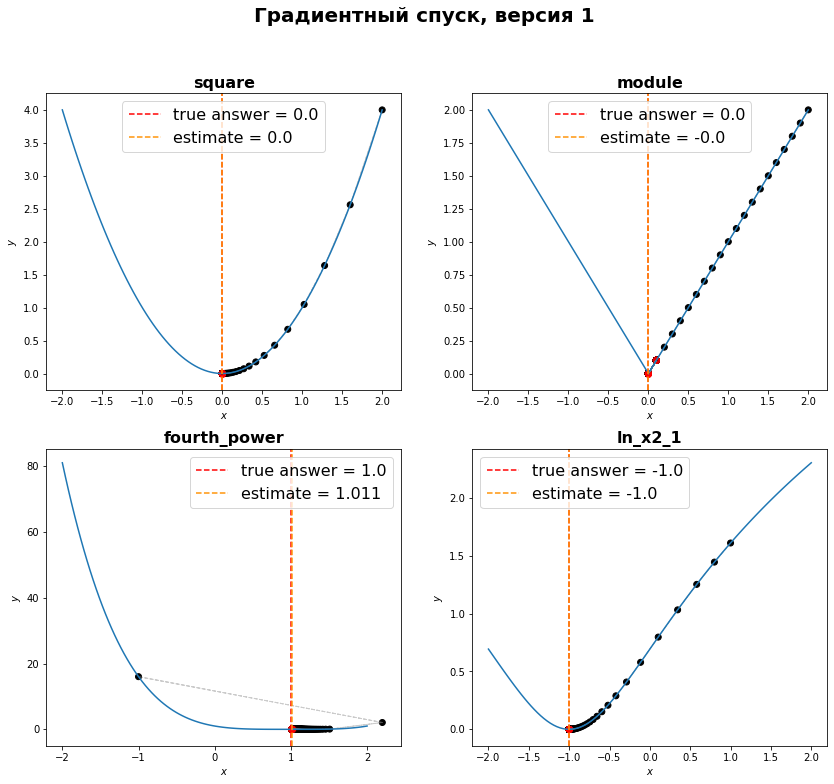

In [35]:
test_cases = {
    "square": {
        "func" : lambda x: x * x, 
        "deriv" : lambda x: 2 * x, 
        "start" : 2, 
        "answer" : 0.0
    },
    "module": {
        "func" : lambda x: abs(x),  
        "deriv" : lambda x: 1 if x > 0 else -1,
        "start" : 2, 
        "answer" : 0.0
    },
    "fourth_power": {
        "func" : lambda x: (x - 1)**4, 
        "deriv" : lambda x: 4 * (x - 1)**3, 
        "start" : -1, 
        "answer" : 1.0
    },
    "ln_x2_1": {
        "func" : lambda x: np.log((x + 1)**2 + 1),  
        "deriv" : lambda x: 2 * (x + 1) / (x**2 +1), 
        "start" : 1, 
        "answer" : -1.0
    }
}

tol = 1e-4  # желаемая точность 
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle("Градиентный спуск, версия 1", fontweight="bold", fontsize=20)
grid = np.linspace(-2, 2, 100)

is_correct, debug_log = test_convergence_1d(
    grad_descent_v1, test_cases, tol, 
    axes, grid
)
if not is_correct:
    print("Не сошлось. Дебажный вывод:")
    for log_entry in debug_log:
        print(log_entry)

## Задание 6 ##
Это задание чуть сложнее. Если раньше Вам нужно было просто найти минимум у довольно хорошей функции, то сейчас в тестах будут плохие. У них будет несколько минимумов и вам нужно найти глобальный у каждой функции.

В общем случае такая задача невыполнима, но у вас будут одномерные функции и все самое интересное будет сосредоточено в районе нуля. Скажем, глобальный минимум будет лежать в пределах `(-3, 3)`. Вам нужно как-то изменить градиентный спуск, который вы написали в предыдущем задании, чтобы он работал и в таком случае.

И снова не забывайте вызывать `callback(x, f(x))` на каждом шаге алгоритма!

***Подсказка***. Попробуйте запускать градиентный спуск, реализованный в предыдущем пункте, со случайными стартовыми точками, а затем из найденных результатов выбирать оптимальный. 


In [74]:
def check(deriv,i,low,high):
    lr = 1e-2;
    for k in range(low+1,high-1):
        i = i- lr * deriv(i)
    return i
def grad_descent_v2(func, deriv, low=None, high=None, callback=None):
    """ 
    Реализация градиентного спуска для функций с несколькими локальным минимумами,
    но с известной окрестностью глобального минимума. 
    Все тесты будут иметь такую природу.
    :param func: float -> float — функция 
    :param deriv: float -> float — её производная
    :param low: float — левая граница окрестности
    :param high: float — правая граница окрестности
    """
    best_estimate = -100000000
    k = 0
    i = low
    while i < high-0.02:
        i+=0.02
        temp = check(deriv,i,low,high)
        #temp = grad_descent_v1(func,deriv,i,callback)
        callback(temp,func(temp))
        if(best_estimate < abs(((func(temp+0.001)-func(temp))/0.001))):
            best_estimate=temp
        
            
    return best_estimate

OverflowError: (34, 'Result too large')

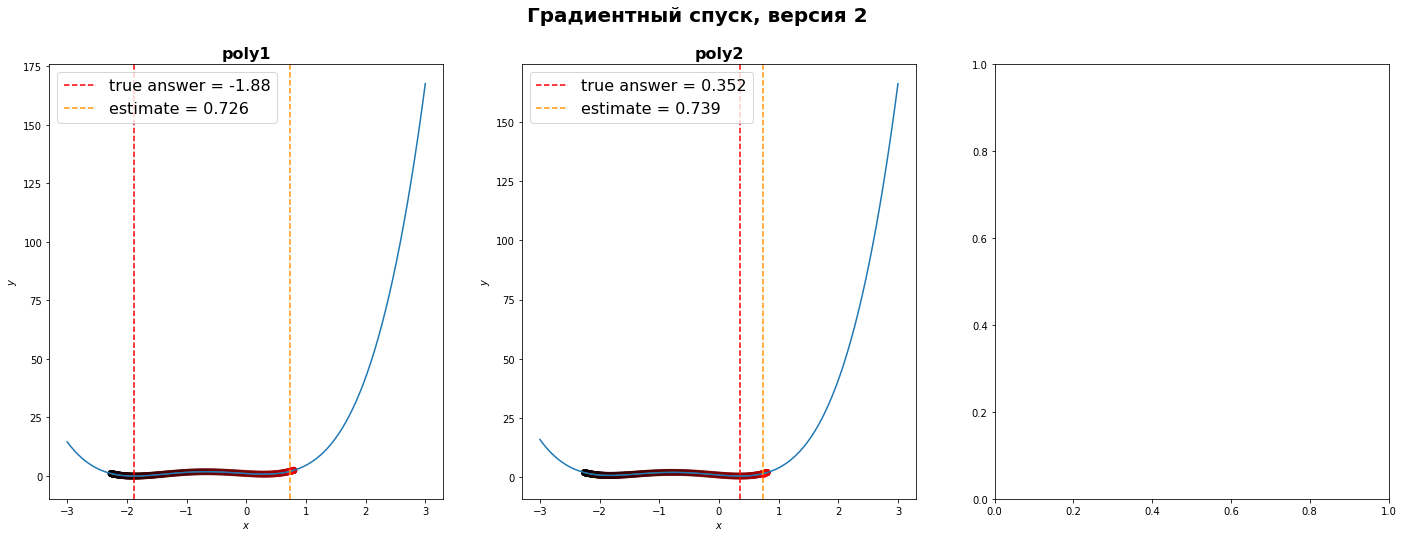

In [75]:
test_cases = {
    "poly1" : {
        "func" : lambda x: x**4 + 3 * x**3 + x**2 - 1.5 * x + 1,
        "deriv" : lambda x: 4 * x**3 + 9 * x**2 + 2 * x - 1.5,
        "low" : -3, "high" : 3, "answer" : -1.88
    },
    "poly2" : {
        "func" : lambda x: x**4 + 3 * x**3 + x**2 - 2 * x + 1.0,
        "deriv" : lambda x: 4 * x**3 + 9 * x**2 + 2 * x - 2.0, 
        "low" : -3, "high" : 3, "answer" : 0.352
    },
    "poly3" : {
        "func" : lambda x: x**6 + 3 * x**3 + x**2 - 2 * x + 1.0,
        "deriv" : lambda x: 6 * x**5 + 9 * x **2 + 2 * x - 2.0, 
        "low" : -3, "high" : 3, "answer" : 0.368
    }
}
tol = 1e-2 # желаемая точность

fig, axes = plt.subplots(1, 3, figsize=(24, 8))
fig.suptitle("Градиентный спуск, версия 2", fontweight="bold", fontsize=20)
grid = np.linspace(-3, 3, 100)

is_correct, debug_log = test_convergence_1d(
    grad_descent_v2, test_cases, tol, 
    axes, grid
)

if not is_correct:
    print("Не сошлось. Дебажный вывод:")
    for log_entry in debug_log:
        print(log_entry)